In [ ]:
import os
import pandas as pd

data_path = os.path.join("..", "data", "Nifty50_Train.csv")
df = pd.read_csv(data_path)


In [ ]:
print(df.head())



         Date         Open         High          Low        Close  \
0  2014-12-01  8605.099609  8623.000000  8545.150391  8555.900391   
1  2014-12-02  8535.450195  8560.200195  8504.650391  8524.700195   
2  2014-12-03  8528.700195  8546.950195  8508.349609  8537.650391   
3  2014-12-04  8582.400391  8626.950195  8526.400391  8564.400391   
4  2014-12-05  8584.250000  8588.349609  8523.900391  8538.299805   

     Adj Close  Volume  
0  8555.900391  152000  
1  8524.700195  137400  
2  8537.650391  153200  
3  8564.400391  143500  
4  8538.299805  143300  


In [ ]:

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2460 non-null   object 
 1   Open       2460 non-null   float64
 2   High       2460 non-null   float64
 3   Low        2460 non-null   float64
 4   Close      2460 non-null   float64
 5   Adj Close  2460 non-null   float64
 6   Volume     2460 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 134.7+ KB
None


In [ ]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count   2460.000000   2460.000000   2460.000000   2460.000000   2460.000000   
mean   13378.693418  13439.900978  13294.398244  13368.679333  13368.679333   
std     4890.101326   4908.185846   4868.170329   4889.518432   4889.518432   
min     7023.649902   7034.200195   6825.799805   6970.600098   6970.600098   
25%     9226.499756   9280.287109   9164.274658   9214.862549   9214.862549   
50%    11464.950195  11495.975098  11387.174805  11440.125000  11440.125000   
75%    17423.962891  17533.111816  17340.549805  17415.425781  17415.425781   
max    26248.250000  26277.349609  26151.400391  26216.050781  26216.050781   

             Volume  
count  2.460000e+03  
mean   3.212565e+05  
std    1.954491e+05  
min    0.000000e+00  
25%    1.932250e+05  
50%    2.610000e+05  
75%    3.840250e+05  
max    1.811000e+06  


In [ ]:
print(df.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


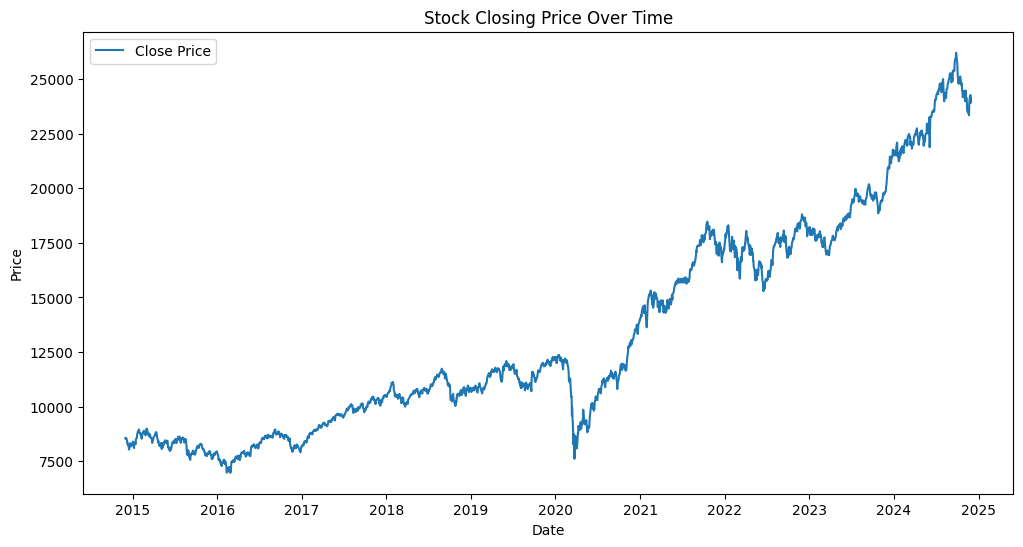

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()


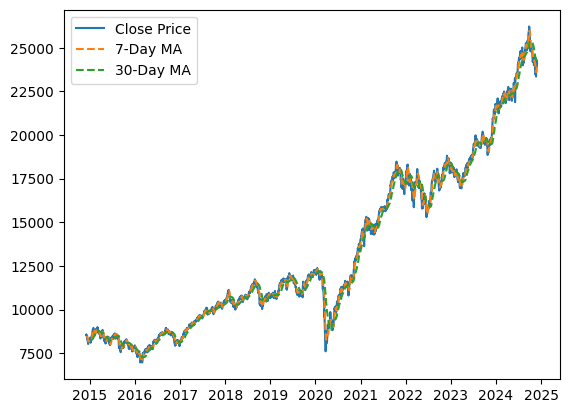

In [ ]:
plt.plot(df['Close'], label='Close Price')
plt.plot(df['7_day_MA'], label='7-Day MA', linestyle='--')
plt.plot(df['30_day_MA'], label='30-Day MA', linestyle='--')
plt.legend()


The chart shows how the Nifty 50 index performed from 2014 to 2024. It shows a steady increase over the years, with a sharp drop in 2020, likely because of the COVID-19 pandemic. After that, the index bounced back strongly. The 7-day and 30-day moving averages show the short-term and long-term trends, and they follow the index's price closely. The index reached its highest point in late 2024, with a few small drops afterward, which could mean the market might slow down for a while. Overall, the chart shows a strong, growing market with occasional ups and downs.

**Time Series decompostion**

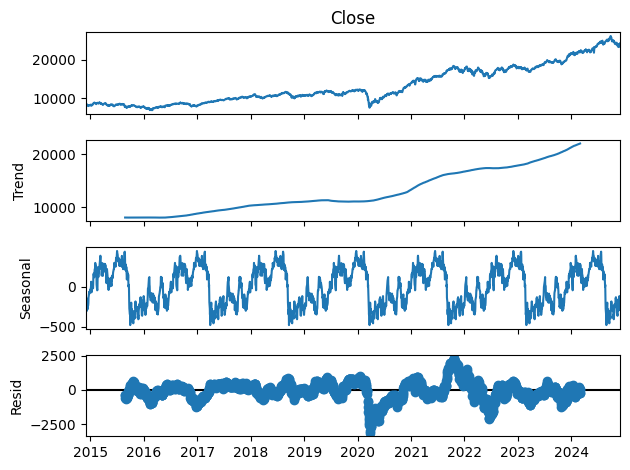

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
decomposition.plot()
plt.show()


This time series  decompostion exhibits a clear upward trend, indicating long-term growth. It also displays significant seasonal fluctuations, suggesting a repeating pattern in the data. The residuals indicate some random variation, with spikes during certain periods, possibly around 2020, hinting at unusual
 events affecting the data.

**Checking  for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.7320739653054207
p-value: 0.9904566986894129


The Augmented Dickey-Fuller (ADF) test is used to determine whether a time series is stationary, meaning its statistical properties like mean and variance remain constant over time. In this test, the null hypothesis states that the time series has a unit root, meaning it is non-stationary, while the alternative hypothesis suggests that the series is stationary. In your case, the ADF test result shows a p-value of 0.9905, which is much higher than the commonly used threshold of 0.05. Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the time series is non-stationary. This means the series has changing properties over time. To proceed with modeling, techniques like differencing or log transformation are often used to make the series stationary, ensuring more reliable predictions.


**Making  data stationary**

In [ ]:
df['Differenced_Close'] = df['Close'].diff().dropna()



Differencing is a technique used to make a time series data stationary by removing trends. It involves subtracting the previous value from the current value of the series, which helps eliminate any upward or downward movement over time. This process focuses on the changes between consecutive values rather than the values themselves, making the data more stable. The .diff() function calculates the difference between each consecutive pair of values, and the .dropna() function removes the first value since its difference is undefined (there is no previous value to subtract from). The purpose of differencing is to make the data stationary, meaning it has a constant mean and variance, which is essential for accurate analysis and forecasting.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Differenced_Close'].dropna())  # drop any NaN values
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -20.654820738390104
p-value: 0.0


Since the p value is less than 0.05 it indicates we reject null hypothesis therefore tha data stationary

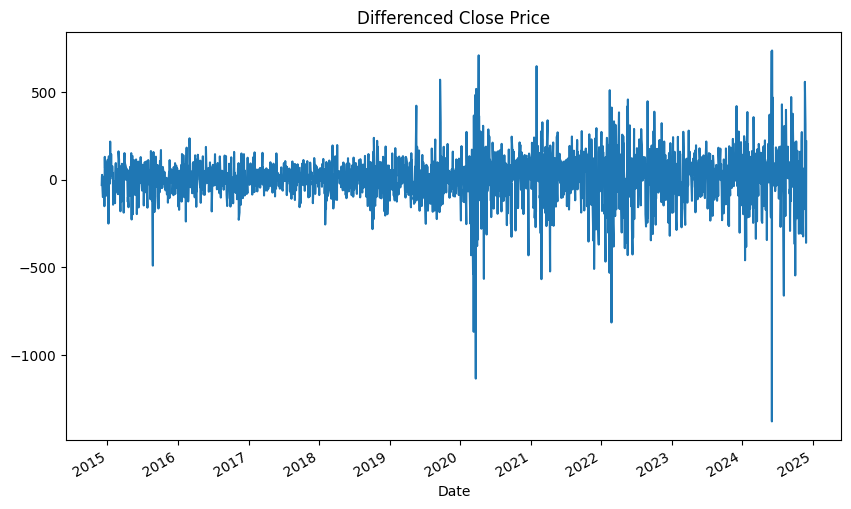

In [ ]:

df['Differenced_Close'].plot(figsize=(10,6))
plt.title('Differenced Close Price')
plt.show()


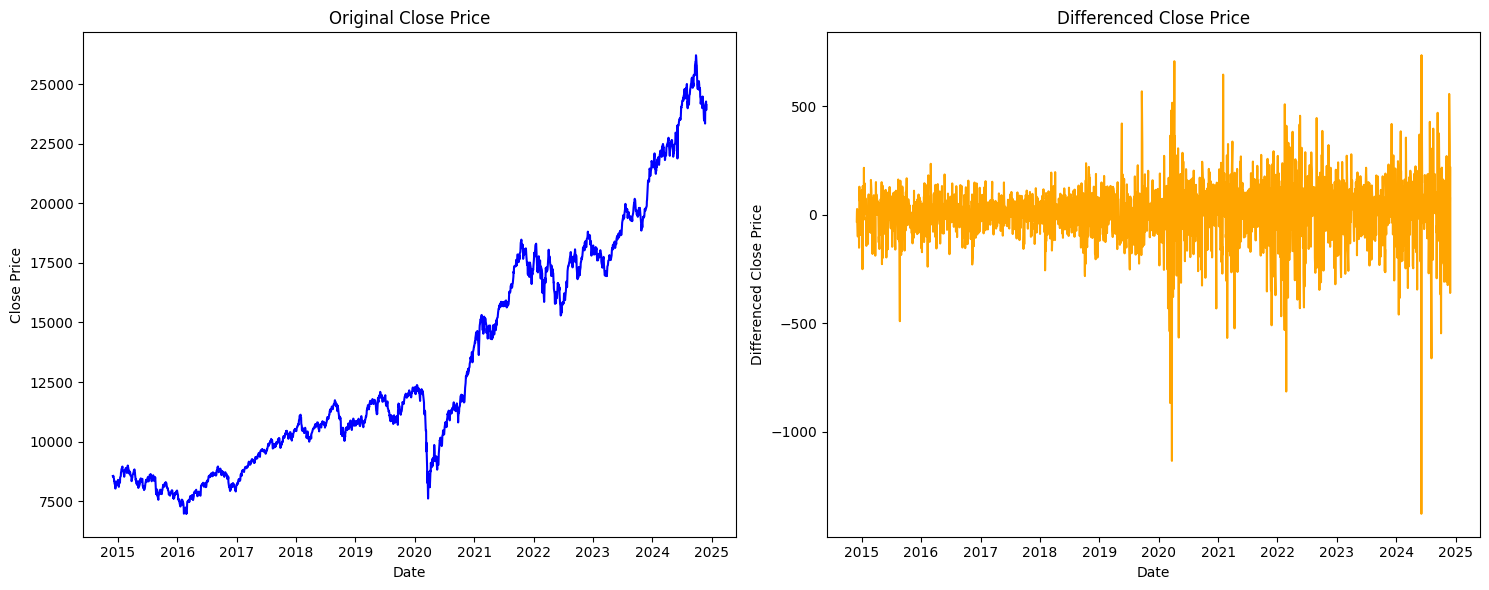

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(15, 6))

# Plot the original Close Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(df['Close'], color='blue')
plt.title('Original Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Plot the Differenced Close Price
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(df['Differenced_Close'], color='orange')
plt.title('Differenced Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


**Analyzing  Volatility**

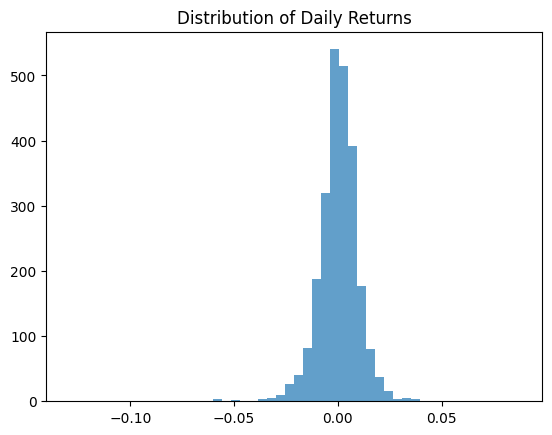

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
plt.hist(df['Daily_Return'].dropna(), bins=50, alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.show()


Here,We are looking at how much the price of an asset changes each day to understand its behavior and risk. Daily returns show the percentage change in the price from one day to the next. The histogram we created shows that most of these changes are small and close to 0%, meaning the asset’s price doesn’t fluctuate much on most days. The shape of the chart is like a bell, showing that big changes, either up or down, are rare but do happen occasionally. This tells us that the asset is generally stable, but there are times when its price can swing more wildly. This helps us understand how risky the asset is and how it might behave in the future.

**Correlation Analysis**

            Open      High       Low     Close    Volume
Open    1.000000  0.999900  0.999842  0.999745  0.061843
High    0.999900  1.000000  0.999803  0.999876  0.065060
Low     0.999842  0.999803  1.000000  0.999883  0.056710
Close   0.999745  0.999876  0.999883  1.000000  0.061020
Volume  0.061843  0.065060  0.056710  0.061020  1.000000


<Axes: >

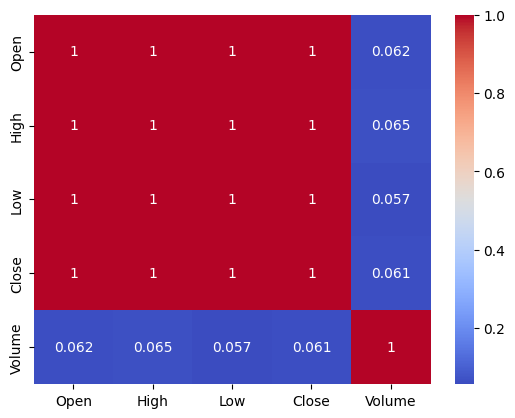

In [ ]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


The correlation matrix shows how the different columns in the stock data are related to each other. Values close to 1 indicate a strong positive relationship, meaning when one value rises, the other does too. Negative values (close to -1) show an inverse relationship, while values near 0 suggest little to no connection.The price columns (Open, High, Low, and Close) have strong positive relationships, meaning that when one price goes up or down, the others tend to follow the same direction. This is normal because all these prices are related to the same stock at the same time. However, the Volume (number of shares traded) is only weakly related to the prices, meaning changes in trading volume don't have a strong effect on the stock price. In short, the prices move together, but the volume doesn’t affect them much.

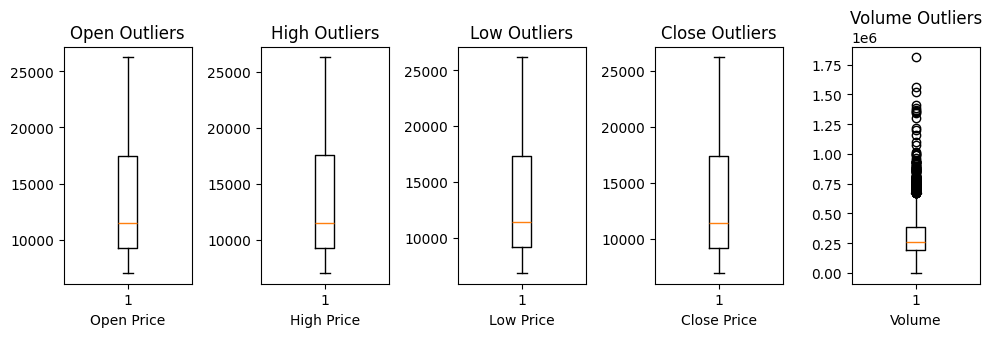

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the boxplot for Open
plt.subplot(2, 5, 1)  # 2 rows, 3 columns, first subplot
plt.boxplot(df['Open'])
plt.title('Open Outliers')
plt.xlabel('Open Price')

# Plot the boxplot for High
plt.subplot(2, 5, 2)  # 2 rows, 3 columns, second subplot
plt.boxplot(df['High'])
plt.title('High Outliers')
plt.xlabel('High Price')

# Plot the boxplot for Low
plt.subplot(2, 5, 3)  # 2 rows, 3 columns, third subplot
plt.boxplot(df['Low'])
plt.title('Low Outliers')
plt.xlabel('Low Price')

# Plot the boxplot for Close
plt.subplot(2, 5, 4)  # 2 rows, 3 columns, fourth subplot
plt.boxplot(df['Close'])
plt.title('Close Outliers')
plt.xlabel('Close Price')

# Plot the boxplot for Volume
plt.subplot(2, 5, 5)  # 2 rows, 3 columns, fifth subplot
plt.boxplot(df['Volume'])
plt.title('Volume Outliers')
plt.xlabel('Volume')

# # Hide the last subplot (not needed)
# plt.subplot(2, 5, 5).axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



This visualization shows boxplots for "Open," "High," "Low," "Close" prices, and "Volume" in a financial dataset. The prices have a consistent range with no significant outliers, indicating stable price behavior. However, the "Volume" plot shows many outliers, suggesting occasional spikes in trading activity, likely due to major events or market volatility. The boxplots highlight the typical values and unusual variations in the data.

**Feature Engineering**



Price ranges


In [ ]:
df['Price_Range'] = df['High'] - df['Low']


In [ ]:
df["Price_Range"]

,Price_Range
Date,
2014-12-01,77.849609
2014-12-02,55.549805
2014-12-03,38.600586
2014-12-04,100.549805
2014-12-05,64.449219
...,...
2024-11-25,216.101562
2024-11-26,217.900391
2024-11-27,208.900391


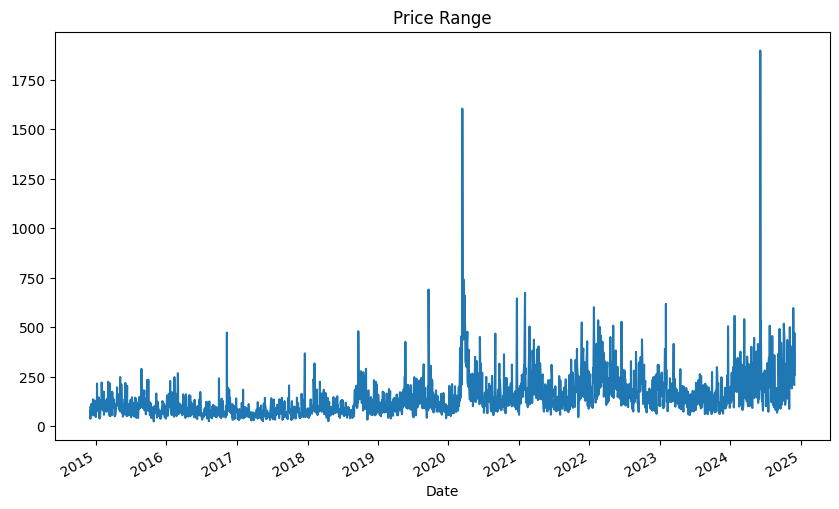

In [ ]:
df['Price_Range'].plot(figsize=(10,6))
plt.title('Price Range')
plt.show()

Cumulative returns

In [ ]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()


In [ ]:
df["Cumulative_Return"]

,Cumulative_Return
Date,
2014-12-01,NaN
2014-12-02,0.996353
2014-12-03,0.997867
2014-12-04,1.000993
2014-12-05,0.997943
...,...
2024-11-25,2.831017
2024-11-26,2.827815
2024-11-27,2.837212


The line of code df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() calculates the cumulative return of an investment over time by considering the daily returns.

Daily returns represent the percentage change in price from one day to the next, and adding 1 to them accounts for both the initial investment and the return.

Daily Return=
(Yesterday’s Close Price - Today’s Close Price)/Yesterday’s Close Price


 The cumprod() function then calculates the cumulative product of these values, which simulates the effect of compounding. This means that instead of just adding the daily returns, it multiplies the return factor each day to reflect how the investment grows over time.

  Cumulative Return on Day n =            ∏
              i=1 to n (1+Daily Return i),


              
​
 The resulting Cumulative_Return series shows how much the investment would have grown if the returns were reinvested, providing an overall view of the investment's performance.


​


Rolling Volatility

In [ ]:
df['30_day_volatility'] = df['Daily_Return'].rolling(window=30).std()


In [ ]:
df["30_day_volatility"]

,30_day_volatility
Date,
2014-12-01,NaN
2014-12-02,NaN
2014-12-03,NaN
2014-12-04,NaN
2014-12-05,NaN
...,...
2024-11-25,0.008601
2024-11-26,0.008601
2024-11-27,0.008523


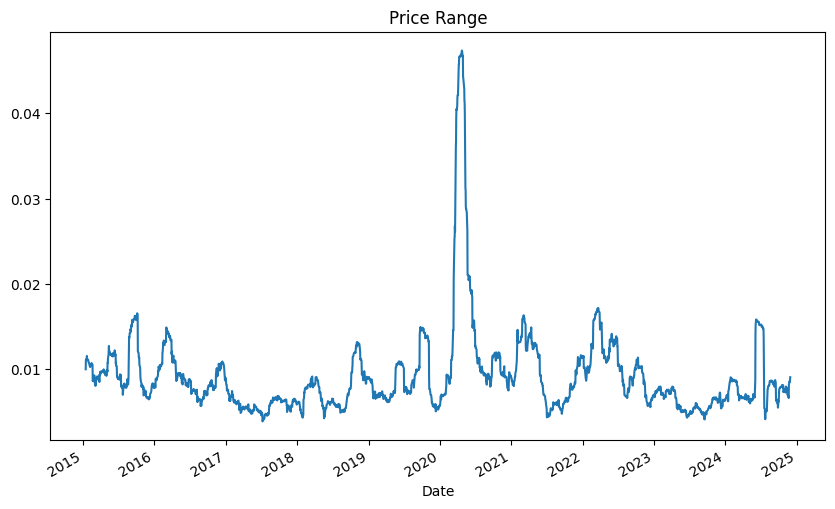

In [ ]:
df['30_day_volatility'].plot(figsize=(10,6))
plt.title('Price Range')
plt.show()

In [ ]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)


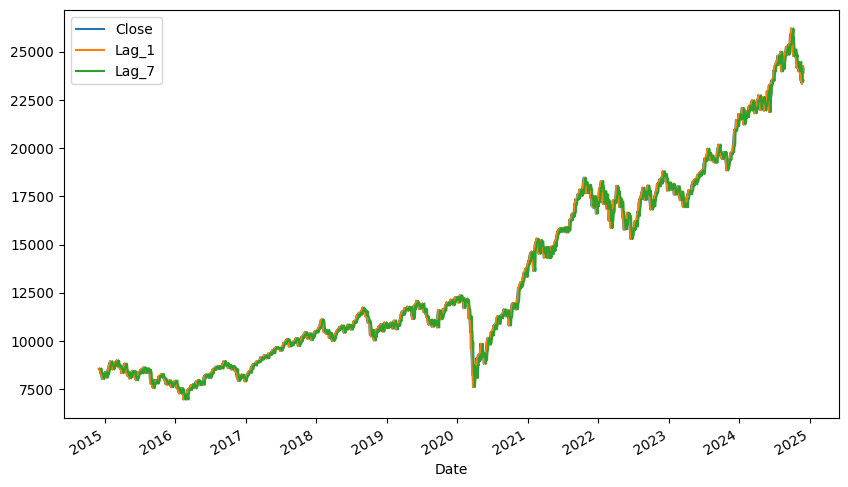

In [ ]:
df[['Close', 'Lag_1', 'Lag_7']].plot(figsize=(10,6))
plt.show()

Exponentially Weighted Moving Average (EWMA)

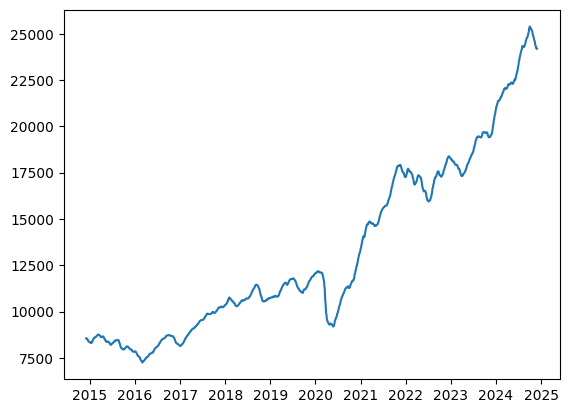

In [ ]:
df['EWMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()
plt.plot(df['EWMA_30'], label='30-Day EWMA')
